<a href="https://colab.research.google.com/github/yussouf88/Deep_learning/blob/main/my_new_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import torch
import torch.nn as nn
import torch.nn.functional as f
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('future.no_silent_downcasting',True)

In [54]:
class model(nn.Module):
  def __init__(self,ip=4,h1=9,h2=9,h3=9,op=3):
    super().__init__()
    self.fc1 = nn.Linear(ip,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.fc3 = nn.Linear(h2,h3)
    self.fc4 = nn.Linear(h3,op)

  def forward(self,x):
    x = f.relu(self.fc1(x))
    x = f.relu(self.fc2(x))
    x = f.relu(self.fc3(x))
    x = self.fc4(x)

    return x

torch.manual_seed(10)
model = model()

In [55]:
#Data Import
ur1 = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(ur1)
df['variety'] = df.species.replace(['setosa', 'versicolor', 'virginica'],[0,1,2])
x = df[['sepal_length',	'sepal_width',	'petal_length',	'petal_width']]
y = df['variety']
x = x.values
y = y.values
y = pd.to_numeric(y)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .2,random_state = 10)
x_train = torch.FloatTensor(x_train)
x_test  = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test  = torch.LongTensor(y_test)

In [56]:
cri = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(),lr = .01)
ep = 100
lss = []
for i in range(ep):
  y_pred = model.forward(x_train)
  loss = cri(y_pred,y_train)
  lss.append(loss.detach().numpy())
  if i%10 == 0 :
    print(f'For epoch {i} loss = {loss}')

  opt.zero_grad()
  loss.backward()
  opt.step()



For epoch 0 loss = 1.1557172536849976
For epoch 10 loss = 1.0374201536178589
For epoch 20 loss = 0.8368822932243347
For epoch 30 loss = 0.629534125328064
For epoch 40 loss = 0.4439689815044403
For epoch 50 loss = 0.242827907204628
For epoch 60 loss = 0.10200957208871841
For epoch 70 loss = 0.062180932611227036
For epoch 80 loss = 0.054745759814977646
For epoch 90 loss = 0.05236787348985672


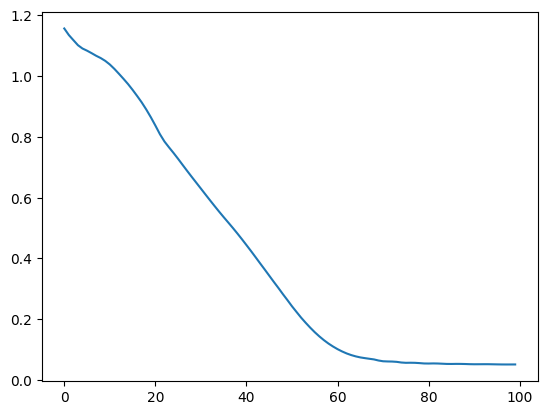

In [57]:
plt.plot(range(ep),lss)
plt.xlabel = 'Eppoch'
plt.ylabel = 'Loss'
plt.show()

In [58]:
with torch.no_grad():
  y_eval = model.forward(x_test)
  loss = cri(y_eval,y_test)
  print(loss)

tensor(0.0380)


In [59]:
corr = 0
with torch.no_grad():
  for i,dat in enumerate(x_test):
    y_eval = model.forward(dat)
    print(f'{i+1} \t {y_eval.argmax()} \t {y_test[i]} \t {y_eval.argmax()-y_test[i]}')




1 	 1 	 1 	 0
2 	 2 	 2 	 0
3 	 0 	 0 	 0
4 	 1 	 1 	 0
5 	 0 	 0 	 0
6 	 1 	 1 	 0
7 	 2 	 1 	 1
8 	 1 	 1 	 0
9 	 0 	 0 	 0
10 	 1 	 1 	 0
11 	 1 	 1 	 0
12 	 2 	 2 	 0
13 	 1 	 1 	 0
14 	 0 	 0 	 0
15 	 0 	 0 	 0
16 	 2 	 2 	 0
17 	 1 	 1 	 0
18 	 0 	 0 	 0
19 	 0 	 0 	 0
20 	 0 	 0 	 0
21 	 2 	 2 	 0
22 	 2 	 2 	 0
23 	 2 	 2 	 0
24 	 0 	 0 	 0
25 	 1 	 1 	 0
26 	 0 	 0 	 0
27 	 1 	 1 	 0
28 	 1 	 1 	 0
29 	 1 	 1 	 0
30 	 2 	 2 	 0


In [ ]:
with torch.